In [ ]:
from pathlib import Path

all_txt_files =[]
for file in Path("txt").rglob("*.txt"):
     all_txt_files.append(file.parent / file.name)
# counts the length of the list
n_files = len(all_txt_files)
print(n_files)

In [ ]:
all_txt_files.sort()
all_txt_files[0]

In [ ]:
all_docs = []
for txt_file in all_txt_files:
    with open(txt_file) as f:
        txt_file_as_string = f.read()
    all_docs.append(txt_file_as_string)

In [ ]:
# My Comments
#         Creates a TfidfVectorizer function that ignore terms that have a document frequency strictly higher than .65 and lower than 1, ignore 
#         stop words, enables inverse-document-frequency reweighting, and normalize by having the sum of squares of vectors to 1. Using this function, it then 
#         vectorizes all of the documents. 

#import the TfidfVectorizer from Scikit-Learn.  
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer = TfidfVectorizer(max_df=.65, min_df=1, stop_words=None, use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(all_docs)

In [ ]:
#       Transforms all of the vectors into arrays and then get the length of that array to verify if we have the same number of arrays as documents that were read in.

transformed_documents_as_array = transformed_documents.toarray()
# use this line of code to verify that the numpy array represents the same number of documents that we have in the file list
len(transformed_documents_as_array)

In [ ]:
#       Import pandas so we can use its data structures and create the data where all of the tf-idf calculations will lie. 
import pandas as pd

# make the output folder if it doesn't already exist
Path("./tf_idf_output").mkdir(parents=True, exist_ok=True)

In [ ]:
#       Get the list of the vocabularies of all the documents and vectorize them and put the term and the tf-idf score into the correlating document csv. 

# construct a list of output file paths using the previous list of text files the relative path for tf_idf_output
output_filenames = [str(txt_file).replace(".txt", ".csv").replace("txt/", "tf_idf_output/") for txt_file in all_txt_files]

# loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

    # output to a csv using the enumerated value for the filename
    one_doc_as_df.to_csv(output_filenames[counter])

(0.0, 100.0)

(-25.0, 100.0)

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

Text(0.5, 1.0, 'document-term matrix represented in 2 dimensions')

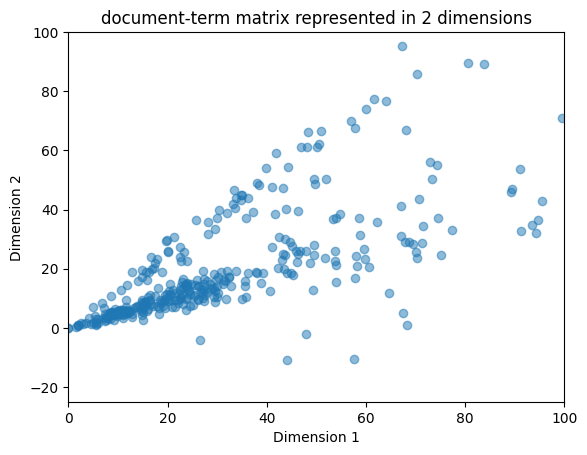

In [50]:
from sklearn.decomposition import TruncatedSVD 
import numpy as np
import matplotlib.pyplot as plt

#Dimensionality Reduction
svd = TruncatedSVD(n_components=2)

U = svd.fit_transform(transformed_documents_as_array)

x = [row[0] for row in U]
y = [row[1] for row in U]
plt.scatter(x, y, alpha=0.5)
plt.xlim(0,100)
plt.ylim(-25, 100)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title(label="document-term matrix represented in 2 dimensions")
plt.show()

# I constrained this graph to show most of the data and avoided the outliers. In this graph
# you can see two possible linear regression lines shown in the graph below. This means that we were able to 
#reduce the documents down to two concepts, which are the most telling or meaningful concepts to these documents. The documents or points that
#were both high in dimension 1 and 2 are very important and influencial aspects of the document, while those closer to 0,0 did not have 
#much different from the rest of the documents.
